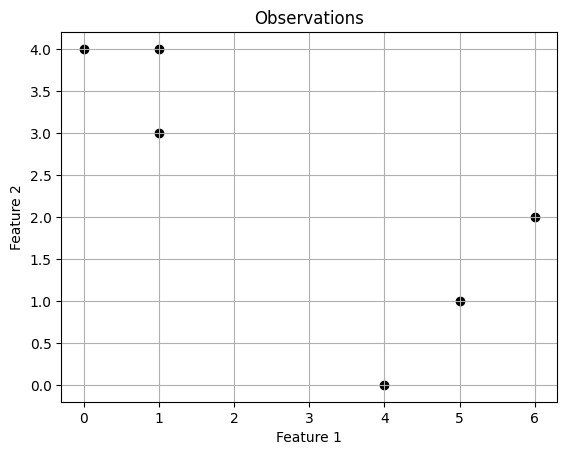

In [1]:
import matplotlib.pyplot as plt
import numpy as np

observations = np.array([[1, 4], [1, 3], [0, 4], [5, 1], [6, 2], [4, 0]])

# plotting the observations
plt.figure()
plt.scatter(observations[:, 0], observations[:, 1], c='black', marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Observations')
plt.grid(True)
plt.show()


In [2]:
# Assigning random cluster labels

initial_labels = np.array([0, 1, 0, 0, 0, 1])
print("Initial cluster labels:", initial_labels)
print(type(initial_labels))


Initial cluster labels: [0 1 0 0 0 1]
<class 'numpy.ndarray'>


In [3]:
def compute_centroids(data, labels, k):
    centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return centroids

# k clusters
k = 2

# Calculate initial centroids
centroids = compute_centroids(observations, initial_labels, k)
print("Initial centroids:\n", centroids)


Initial centroids:
 [[3.   2.75]
 [2.5  1.5 ]]


In [4]:
from scipy.spatial.distance import cdist

def assign_clusters(data, centroids):
    distances = cdist(data, centroids, 'euclidean')
    print(distances)
    return np.argmin(distances, axis=1)

# Assigning clusters based on initial centroids
new_labels = assign_clusters(observations, centroids)
print("Cluster labels after assignment:", new_labels)


[[2.35849528 2.91547595]
 [2.01556444 2.12132034]
 [3.25       3.53553391]
 [2.65753645 2.54950976]
 [3.09232922 3.53553391]
 [2.92617498 2.12132034]]
Cluster labels after assignment: [0 0 0 1 0 1]


In [7]:
def compute_centroids(data, labels, k):
    centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return centroids

k = 2

# Compute initial centroids
centroids = compute_centroids(observations, new_labels, k)
print("Initial centroids:\n", centroids)


Initial centroids:
 [[0.66666667 3.66666667]
 [5.         1.        ]]


In [6]:
from scipy.spatial.distance import cdist

def assign_clusters(data, centroids):
    distances = cdist(data, centroids, 'euclidean')
    return np.argmin(distances, axis=1)

# Assign clusters based on initial centroids
new_labels = assign_clusters(observations, centroids)
print("Cluster labels after assignment:", new_labels)


Cluster labels after assignment: [0 0 0 1 1 1]


def compute_centroids(data, labels, k):
    centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    plot(centroids)
    return centroids

# Number of clusters
k = 2

# Compute initial centroids
centroids = compute_centroids(observations, new_labels, k)
print("Initial centroids:\n", centroids)


In [ ]:
from scipy.spatial.distance import cdist

def assign_clusters(data, centroids):
    distances = cdist(data, centroids, 'euclidean')
    return np.argmin(distances, axis=1)

# Assign clusters based on initial centroids
new_labels = assign_clusters(observations, centroids)
print("Cluster labels after assignment:", new_labels)


Cluster labels after assignment: [0 0 0 1 1 1]


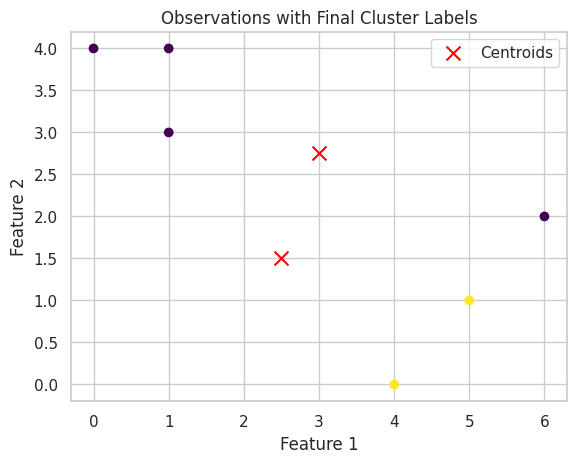

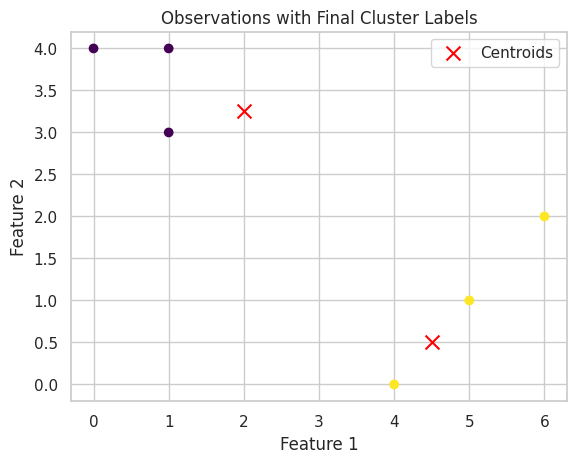

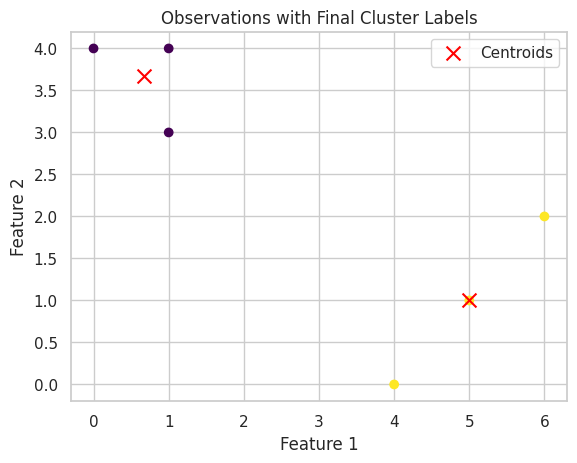

Final cluster labels: [0 0 0 1 1 1]
Final centroids:
 [[0.66666667 3.66666667]
 [5.         1.        ]]


In [ ]:
def kmeans(data, k, max_iters=100):
    # Randomly initialize cluster labels
    labels =np.array([0, 1, 0, 0, 0, 1])

    for _ in range(max_iters):
        # Compute centroids
        centroids = compute_centroids(data, labels, k)

        # Assign clusters
        new_labels = assign_clusters(data, centroids)
        plot(centroids,new_labels)
        # Check for convergence
        if np.array_equal(labels, new_labels):
            break

        labels = new_labels

    return labels, centroids

# Run K-means
final_labels, final_centroids = kmeans(observations, k)
print("Final cluster labels:", final_labels)
print("Final centroids:\n", final_centroids)


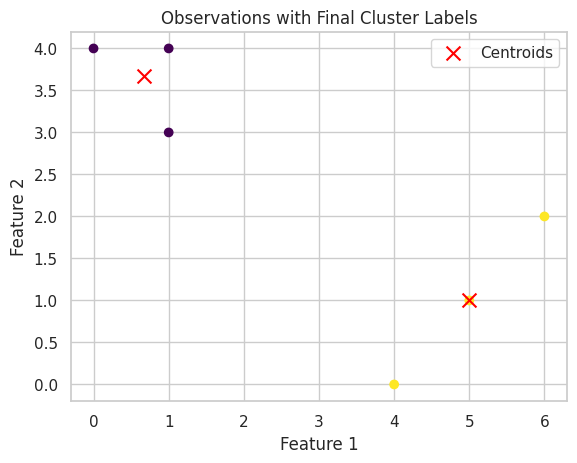

In [ ]:
def plot(cent,clust):# Create the plot
  plt.figure()
  plt.scatter(observations[:, 0], observations[:, 1], c=clust, cmap='viridis', marker='o')

  # Plot the centroids
  plt.scatter(cent[:, 0], cent[:, 1], c='red', marker='x', s=100, label='Centroids')

  # Add labels and title
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('Observations with Final Cluster Labels')
  plt.legend()
  plt.grid(True)
  plt.show()

plot(final_centroids,final_labels)

In [ ]:
# Answer 3

import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Define the dataset
X1 = np.array([[4, 1], [2, 4], [2, 3], [3, 6], [4, 4]])
X2 = np.array([[9, 10], [6, 8], [9, 5], [8, 7], [10, 8]])

# Combine the data and create labels
X = np.vstack((X1, X2))
y = np.array([0]*len(X1) + [1]*len(X2))  # 0 for X1, 1 for X2


In [ ]:
# Initialize LDA
lda = LDA(n_components=1)  # Reduce to 1 dimension
X_lda = lda.fit_transform(X, y)

# Output the transformed data
print("Transformed Data (LDA):\n", X_lda)

transformed_X1 = np.array([4.07, 3.41, 3.02, 5.12, 5.25])
transformed_X2 = np.array([12.20, 8.66, 10.24, 10.11, 12.34])


Transformed Data (LDA):
 [[-2.58072572]
 [-3.0862287 ]
 [-3.3870746 ]
 [-1.78051656]
 [-1.67818802]
 [ 3.64698908]
 [ 0.93323626]
 [ 2.14275958]
 [ 2.04043104]
 [ 3.74931762]]


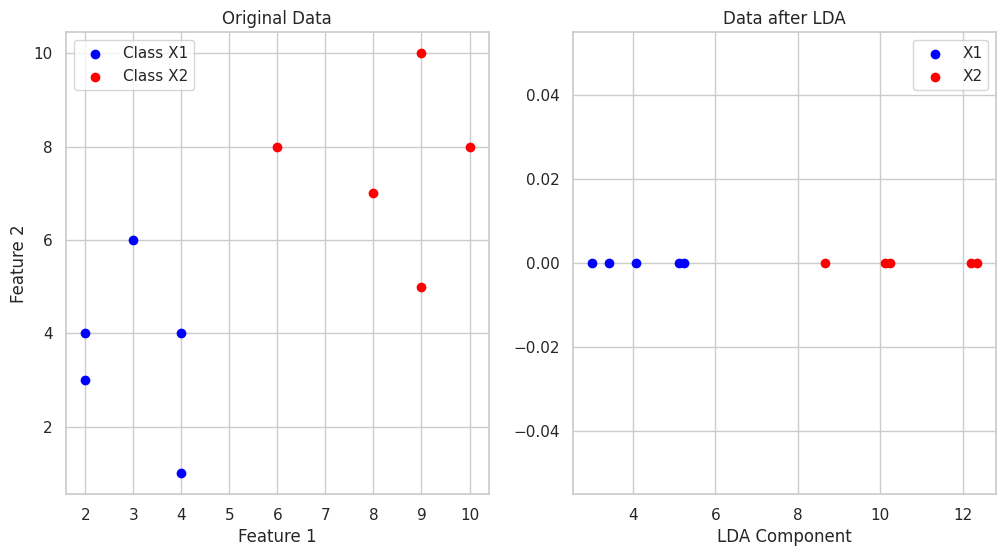

In [ ]:
# Plot original data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X1[:, 0], X1[:, 1], color='blue', label='Class X1')
plt.scatter(X2[:, 0], X2[:, 1], color='red', label='Class X2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data')
plt.legend()

# Plot transformed data
plt.subplot(1, 2, 2)
plt.scatter(transformed_X1, np.zeros_like(transformed_X1), color='blue', label='X1', marker='o')
plt.scatter(transformed_X2, np.zeros_like(transformed_X2), color='red', label='X2', marker='o')
plt.xlabel('LDA Component')
plt.title('Data after LDA')
plt.legend()

plt.show()
